# Importing Libraries and Packages


In [1]:
import pandas as pd
import numpy as np
import collections

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import IsolationForest
from numpy import where

 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import os
import category_encoders as ce
from tqdm import tqdm_notebook



from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)

from seaborn import diverging_palette

# Importing Dataset


In [2]:
df = pd.read_csv('D://Downloads//SBAnational.csv',low_memory=False)

In [3]:
df.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  \
0  ...          N       Y         NaN         28-Feb-99        $60,000.00    
1  ...          N       Y         NaN         31-May-97        $40,000.00    
2  ...          N       N         NaN         31-Dec-97       $287,000.00    
3  ...          N       Y         NaN         30-Jun-97        $35,000.00    
4  ...          N       N         NaN         14-May-97       $229,000.00    

   BalanceGross  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0        $0.00        P I F       $0.00    $60,000.00    $48,000.00   
1        $0.00        P I F       $0.00    $40,000.00    $32,000.00   
2        $0.00        P I F       $0.00   $287,000.00   $215,250.00   
3        $0.00        P I F       $0.00    $35,000.00    $28,000.00   
4        $0.00        P I F       $0.00   $229,000.00   $229,000.00   

[5 rows x 27 columns]

# Checking Datatype, Shape, Column Names

In [4]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [5]:
df.shape

(899164, 27)

In [6]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

# Data Dictionary

In [84]:
df_desc= pd.read_excel('D://Downloads//data_desc.xlsx').dropna()
df_desc.style.set_properties(subset=['Description'], **{'width': '1000px'})

# Data Exploration

## Provide Descriptive Statistics

In [7]:
df.describe()

LoanNr_ChkDgt            Zip          NAICS           Term  \
count   8.991640e+05  899164.000000  899164.000000  899164.000000   
mean    4.772612e+09   53804.391241  398660.950146     110.773078   
std     2.538175e+09   31184.159152  263318.312759      78.857305   
min     1.000014e+09       0.000000       0.000000       0.000000   
25%     2.589758e+09   27587.000000  235210.000000      60.000000   
50%     4.361439e+09   55410.000000  445310.000000      84.000000   
75%     6.904627e+09   83704.000000  561730.000000     120.000000   
max     9.996003e+09   99999.000000  928120.000000     569.000000   

               NoEmp       NewExist      CreateJob    RetainedJob  \
count  899164.000000  899028.000000  899164.000000  899164.000000   
mean       11.411353       1.280404       8.430376      10.797257   
std        74.108196       0.451750     236.688165     237.120600   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.000000       0.000000       0.000000   
50%         4.000000       1.000000       0.000000       1.000000   
75%        10.000000       2.000000       1.000000       4.000000   
max      9999.000000       2.000000    8800.000000    9500.000000   

       FranchiseCode     UrbanRural  
count  899164.000000  899164.000000  
mean     2753.725933       0.757748  
std     12758.019136       0.646436  
min         0.000000       0.000000  
25%         1.000000       0.000000  
50%         1.000000       1.000000  
75%         1.000000       1.000000  
max     99999.000000       2.000000

## Check for missing values 

In [8]:
# Check for NA's
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

## Visialize Missing Values 
The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

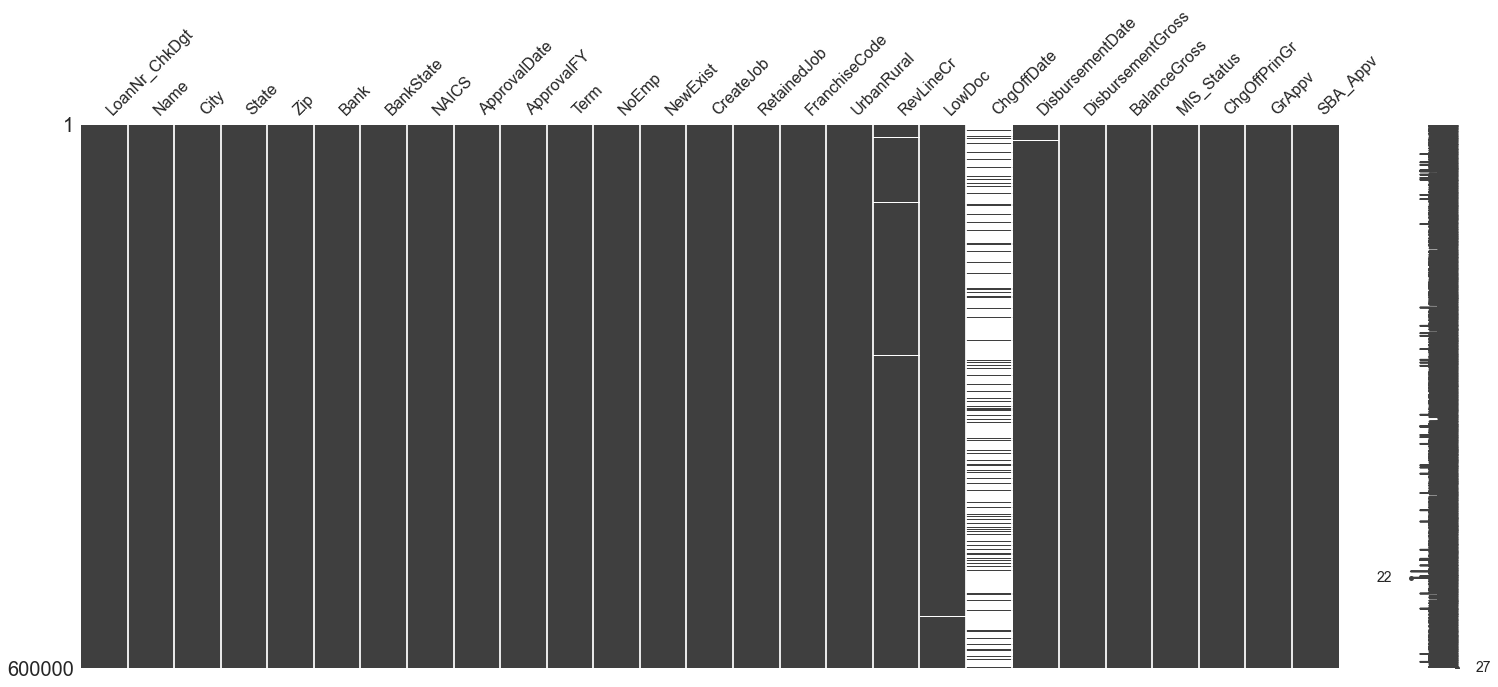

In [9]:
import missingno as msno
ax = msno.matrix(df.sample(600000))

In [10]:
#Defining function to calculate missing value statistics
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns



In [11]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 27 columns.
There are 11 columns that have missing values.


Missing Values  % of Total Values
ChgOffDate                736465               81.9
RevLineCr                   4528                0.5
LowDoc                      2582                0.3
DisbursementDate            2368                0.3
MIS_Status                  1997                0.2
BankState                   1566                0.2
Bank                        1559                0.2
NewExist                     136                0.0
City                          30                0.0
Name                          14                0.0
State                         14                0.0

<AxesSubplot:>

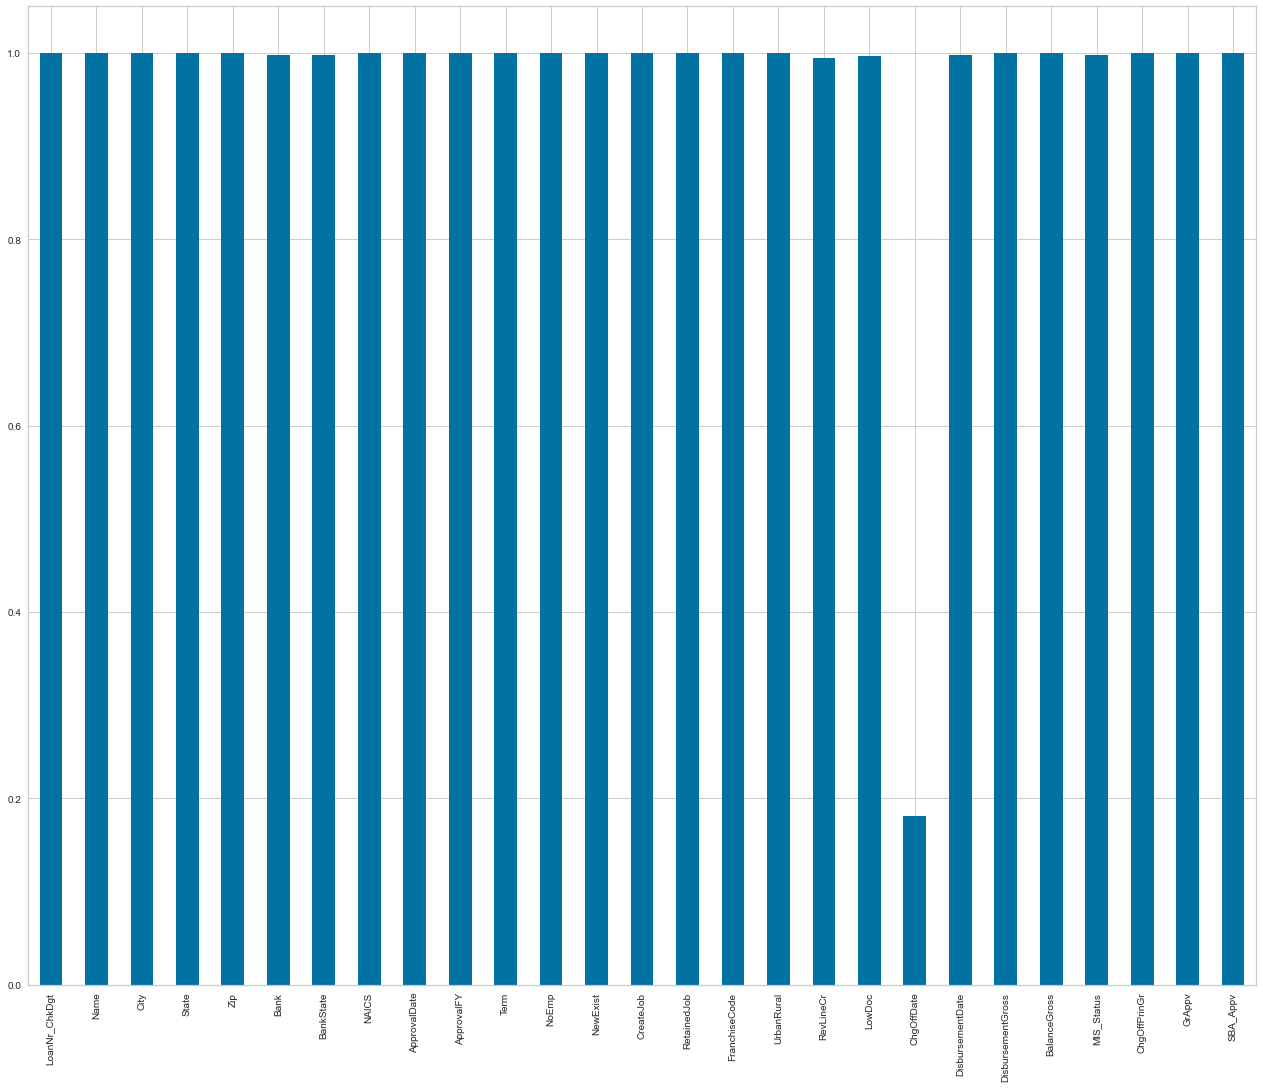

In [12]:
fig, ax = plt.subplots(figsize=(22, 18))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

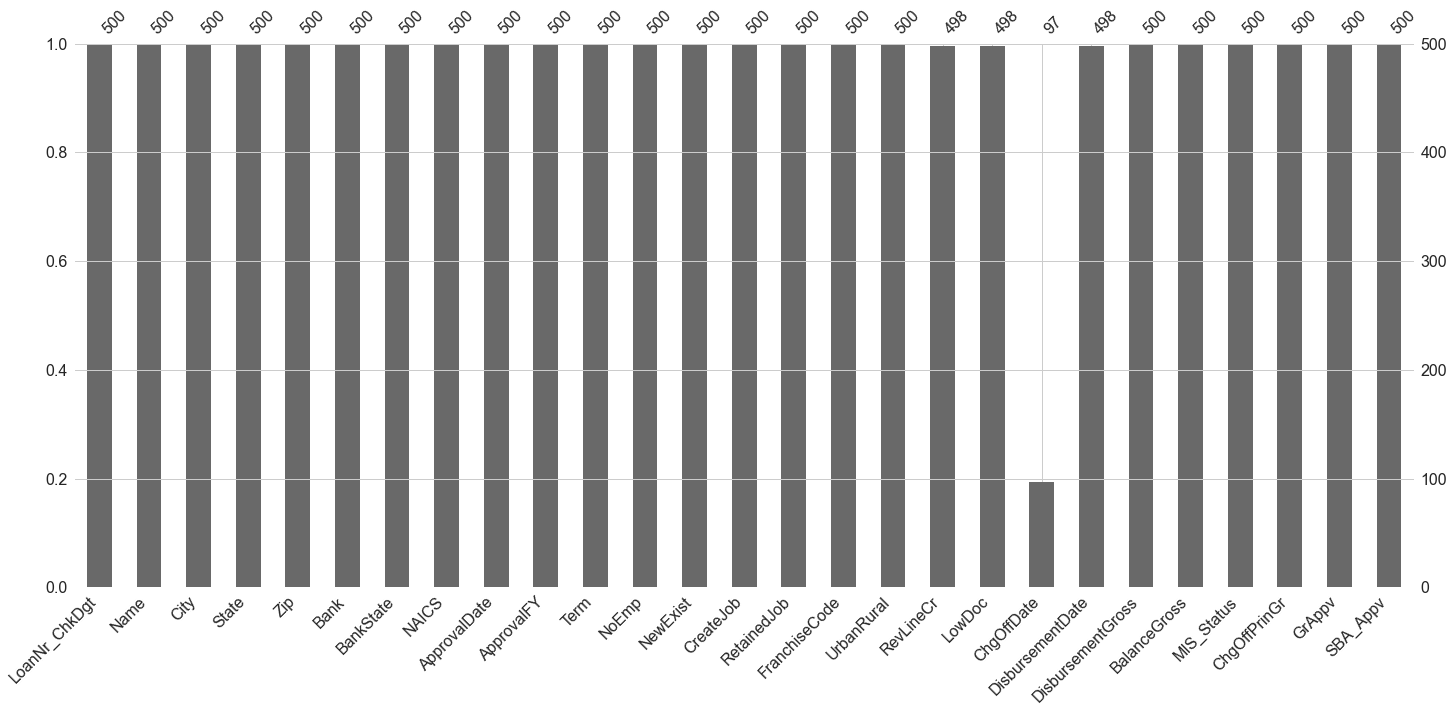

In [13]:
ax = msno.bar(df.sample(500))

# Correlation Matrix

<AxesSubplot:>

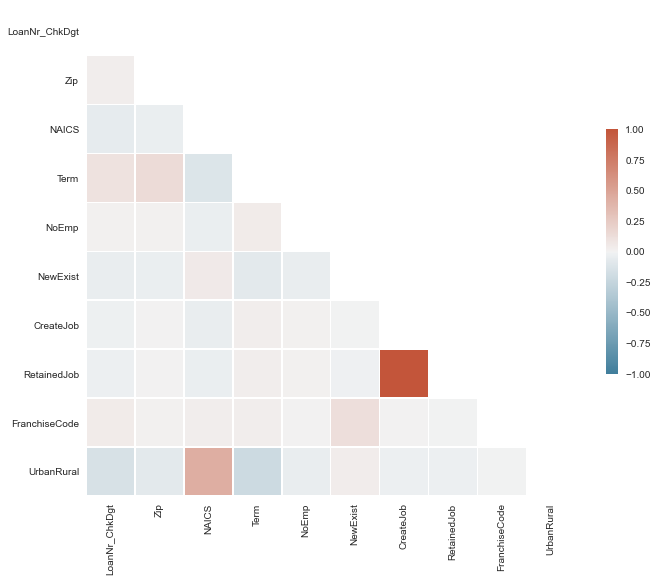

In [14]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Data Visualization

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


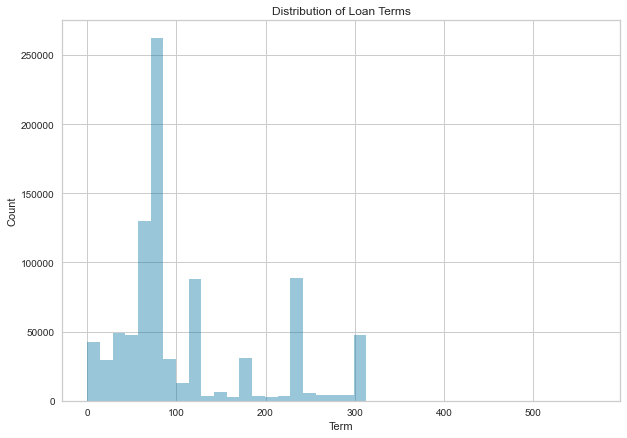

In [15]:
#Disbursement of Loan Terms
fig = plt.figure(figsize=(10,7))
sns.distplot(a=df['Term'], bins = 40,kde=False)
plt.title('Distribution of Loan Terms')
plt.ylabel('Count')
plt.show()

In [16]:
#There seems to be popular loan terms around the 80, 250 and 300 month marks.


In [17]:
#Replacing values 1976A to 1976
df['ApprovalFY'].mask(df['ApprovalFY'] == '1976A', '1976', inplace=True)

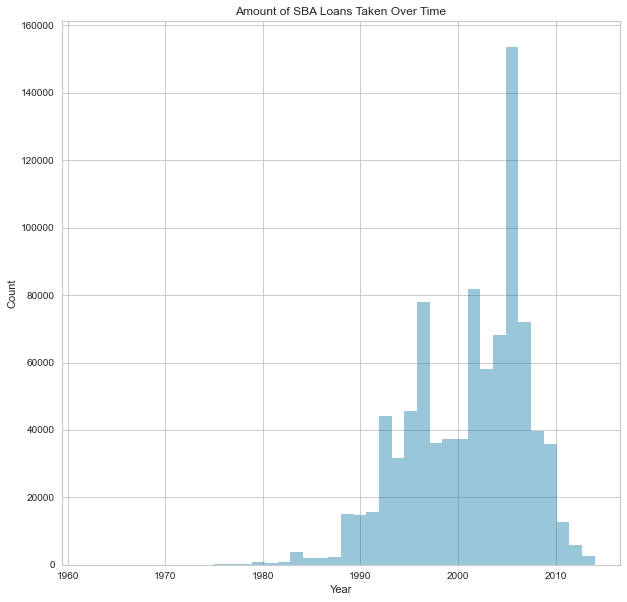

In [18]:
#Amount of SBA Loans taken over time
fig = plt.figure(figsize=(10,10))
sns.distplot(a=df['ApprovalFY'],bins=40, kde=False)
plt.title('Amount of SBA Loans Taken Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

In [19]:
#We can also observe a decrease in the amount of SBA loans taken after 2010.

In [20]:
# makes column for Paid in Full (1=Paid in full, 0 = no)
df['Paid'] = df['MIS_Status'].replace({'P I F':'1','CHGOFF':'0'}, regex=True)
df['Paid'] = df['Paid'].astype(float)

#State-wise statistics 
state_default = df.groupby(['State','Paid'])['State'].count().unstack('Paid')
state_default['Total SBA Loans Taken'] = state_default[1] + state_default[0]
state_default['PIF Percentage'] = state_default[1]/(state_default[1] + state_default[0])
state_default['Default Percentage'] = (1 - state_default['PIF Percentage'])
state_default = state_default.sort_values(by = 'Default Percentage')
state_default

Paid     0.0     1.0  Total SBA Loans Taken  PIF Percentage  \
State                                                         
MT       594    8143                   8737        0.932013   
WY       199    2639                   2838        0.929880   
VT       404    5029                   5433        0.925640   
ND       402    4835                   5237        0.923238   
SD       349    4079                   4428        0.921183   
ME       583    5354                   5937        0.901802   
NH      1289   10734                  12023        0.892789   
NM       658    5368                   6026        0.890807   
RI      1016    7932                   8948        0.886455   
NE       726    5655                   6381        0.886225   
IA      1382   10604                  11986        0.884699   
AK       281    2122                   2403        0.883063   
MN      2849   21510                  24359        0.883041   
WI      2560   18461                  21021        0.878217   
MA      3257   21835                  25092        0.870198   
KS      1497    9958                  11455        0.869315   
CT      1703   10424                  12127        0.859570   
WA      3268   19987                  23255        0.859471   
ID      1338    8158                   9496        0.859099   
PA      5089   29712                  34801        0.853769   
HI       550    3057                   3607        0.847519   
MO      3152   17500                  20652        0.847376   
OR      1688    9353                  11041        0.847115   
OK      1544    8401                   9945        0.844746   
MS      1218    6450                   7668        0.841158   
WV       530    2755                   3285        0.838661   
OH      5349   27149                  32498        0.835405   
AL      1389    6971                   8360        0.833852   
AR      1064    5269                   6333        0.831991   
IN      2482   11597                  14079        0.823709   
UT      3316   15456                  18772        0.823354   
CO      3671   16927                  20598        0.821779   
DE       394    1799                   2193        0.820337   
LA      1730    7840                   9570        0.819227   
CA     24160  106328                 130488        0.814849   
VA      2487   10720                  13207        0.811691   
TX     13265   57136                  70401        0.811579   
NC      2755   11531                  14286        0.807154   
KY      1497    6223                   7720        0.806088   
MD      2614   10645                  13259        0.802851   
NY     11450   45944                  57394        0.800502   
NJ      4829   19181                  24010        0.798875   
SC      1145    4450                   5595        0.795353   
AZ      3657   13967                  17624        0.792499   
TN      1994    7406                   9400        0.787872   
MI      4612   15881                  20493        0.774948   
IL      6709   22885                  29594        0.773299   
NV      1863    6159                   8022        0.767764   
GA      5337   16935                  22272        0.760372   
DC       387    1226                   1613        0.760074   
FL     11274   29918                  41192        0.726306   

Paid   Default Percentage  
State                      
MT               0.067987  
WY               0.070120  
VT               0.074360  
ND               0.076762  
SD               0.078817  
ME               0.098198  
NH               0.107211  
NM               0.109193  
RI               0.113545  
NE               0.113775  
IA               0.115301  
AK               0.116937  
MN               0.116959  
WI               0.121783  
MA               0.129802  
KS               0.130685  
CT               0.140430  
WA               0.140529  
ID               0.140901  
PA               0.146231  
HI               0.152481  
MO              

In [21]:
#Florida and DC had the highest default rates (25.7% and 23.5%)
#Montana and Wyoming had the lowest default rates (6.8% and 6.9%)
#There does not seem to be any correlation between the amount of loans a state took and their default rate; for example Montana and DC have a similar amount of total loans taken and they are on opposite ends of the spectrum for default rate.
#Overall, our analysis of state has shown us that there are major differences in default rates among each state, which is very important for us to consider when creating our model. We can either specify our model to a certain state or region, or make sure we choose a type of model that effectively handles this kind of variance.

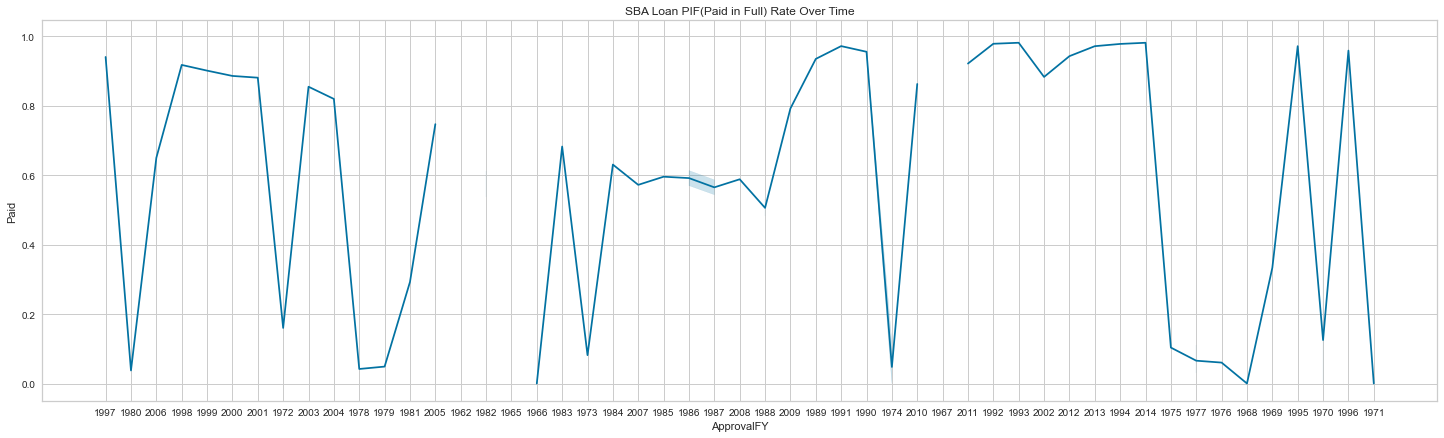

In [22]:
#Trends for the loans paid in full
fig = plt.figure(figsize=(25,7))
sns.lineplot(x="ApprovalFY", y="Paid", data=df)
plt.title('SBA Loan PIF(Paid in Full) Rate Over Time')
plt.show()

In [23]:
#Dropping column Paid
del df['Paid']

In [24]:
df.head()

LoanNr_ChkDgt                           Name          City State    Zip  \
0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE    IN  47711   
1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS    IN  46526   
2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON    IN  47401   
3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW    OK  74012   
4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO    FL  32801   

                            Bank BankState   NAICS ApprovalDate ApprovalFY  \
0               FIFTH THIRD BANK        OH  451120    28-Feb-97       1997   
1                1ST SOURCE BANK        IN  722410    28-Feb-97       1997   
2        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97       1997   
3  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97       1997   
4        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97       1997   

   ...  RevLineCr  LowDoc  ChgOffDate  DisbursementDate  DisbursementGross  \
0  ...          N       Y         NaN         28-Feb-99        $60,000.00    
1  ...          N       Y         NaN         31-May-97        $40,000.00    
2  ...          N       N         NaN         31-Dec-97       $287,000.00    
3  ...          N       Y         NaN         30-Jun-97        $35,000.00    
4  ...          N       N         NaN         14-May-97       $229,000.00    

   BalanceGross  MIS_Status ChgOffPrinGr        GrAppv      SBA_Appv  
0        $0.00        P I F       $0.00    $60,000.00    $48,000.00   
1        $0.00        P I F       $0.00    $40,000.00    $32,000.00   
2        $0.00        P I F       $0.00   $287,000.00   $215,250.00   
3        $0.00        P I F       $0.00    $35,000.00    $28,000.00   
4        $0.00        P I F       $0.00   $229,000.00   $229,000.00   

[5 rows x 27 columns]

## Pandas Profiling 

In [25]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()
profile.to_file("your_report.html")

In [26]:
#Checking different values in the Target Variable (MIS_Status)
collections.Counter(df.MIS_Status).keys()

dict_keys(['P I F', 'CHGOFF', nan])

In [27]:
#Checking the count of different values in the Target Variable (MIS_Status)
collections.Counter(df.MIS_Status).values()

dict_values([739609, 157558, 1997])

In [28]:
#We have only 157558 observations where a company has defaulted(CHGOFF) on the loan. Also we have 1997 NA values in our target variable.

# Data Transformation and Preprocessing

In [29]:
df.head()
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

## Dropping rows having NA's in City and Target Variable MIS_Status 

In [30]:
df = df.dropna(axis =0, subset=['City','MIS_Status'])

## Target Variable (MIS_Status)- Assigning 1= If loan was Paid Fully, 0= Company defaulted on loan 

In [31]:
loan_status = {'P I F': 0,'CHGOFF': 1} 
df.MIS_Status = [loan_status[item] for item in df.MIS_Status]

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Converting the currency values to float. (Currently they are in $) 

In [32]:
import warnings
warnings.filterwarnings('ignore')
temp = [21,22,24,25,26] #To convert to float.
for i in temp:
    df[df.columns[i]] = df[df.columns[i]].replace('[\$,]', '', regex=True).astype(float) 

## Column name has no significance in  our analysis hence, dropping it 

In [33]:
df = df.drop(axis =1, columns = ['Name','ChgOffDate'])

## change fiscal year of commitment from object to int 

In [34]:
df['ApprovalFY'] = df['ApprovalFY'].replace({'A':'','B':''}, regex = True).astype(int)

## change new vs existing business from 1 and 2 to 1(new) and 0(existing) for interpretability 

In [35]:
df['NewExist'] = df['NewExist'].replace(1,0)
df['NewExist'] = df['NewExist'].replace(2,1)

## change RevLineCR to binary variable 

In [36]:
ore = ce.OrdinalEncoder(
mapping=[
{
"col": "RevLineCr",
"mapping": {
"Y": 0,
"N": 1

},
}
]
)
df=ore.fit_transform(df)

## change LowDoc to binary variable 

In [37]:
ore = ce.OrdinalEncoder(
mapping=[
{
"col": "LowDoc",
"mapping": {
"Y": 0,
"N": 1

},
}
]
)
df=ore.fit_transform(df)

## make franchise a binary variable

In [38]:
df['FranchiseCode'] = df['FranchiseCode'].replace(1,0)
df['FranchiseCode'] = np.where((df.FranchiseCode != 0),1,df.FranchiseCode)
df.rename(columns={"FranchiseCode":"Franchise"},inplace=True)

## Transform NAICS code to industry and get dummies

In [39]:
# Selects only the first two numbers of the NAICS code
df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])

# Maps the NAICS code to each industry
df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})

# Remove records where Industry is NaN (NAICS code was a 0)
df.dropna(subset=['Industry'], inplace=True)

#convert into dummies 
df = pd.get_dummies(df, columns=['Industry'])

## drop columns that dont add value to the prediction or affect the prediction

In [40]:
#columns that occured after signing the loan will be dropped
df = df.drop(['LoanNr_ChkDgt','Bank','GrAppv','DisbursementGross', 'City', 'ApprovalDate', 
              'Zip','BankState', 'DisbursementDate','BalanceGross','NAICS'], axis = 1)

## Substituting each state with its corresponding state default value 

In [41]:
state_def = {'MT':.095, 'WY':.1,'VT':.061,'ND':.062,'SD':.106,'ME':.098,
            'NH':.102,'NM':.147,'NE':.181,'AK':.111,'IA':.102,'MN':.082,
            'RI':.062,'WI':.09,'MA':.058,'KS':.116,'WA':.09,'CT':.11,
            'ID':.086,'PA':.092,'OR':.114,'MO':.099,'HI':.093,'OK':.128,
            'MS':.149,'WV':.146,'OH':.111,'AL':.133,'AR':.104,'IN':.142,
            'UT':.075,'DE':.088,'CA':.087,'CO':.108,'VA':0.098,'LA':.134,
            'NC':.105,'TX':.104,'MD':.093,'KY':.123,'SC':.115,'NY':.086,
            'NJ':.094,'AZ':.114,'TN':.115,'MI':.115,'NV':.181,'IL':.095,
            'GA':.108,'DC':.082,'FL':.073} 
df['State'] = df['State'].map(state_def)

df = df.rename(columns={'State':'State Default Rate',})

## Imputing missing values with median

In [42]:
df=df.fillna(df.median())

## Specify our target variable and predictors 

In [43]:
y = df['MIS_Status']
X = df.drop(['MIS_Status'], axis = 1)

## Mutual Information 

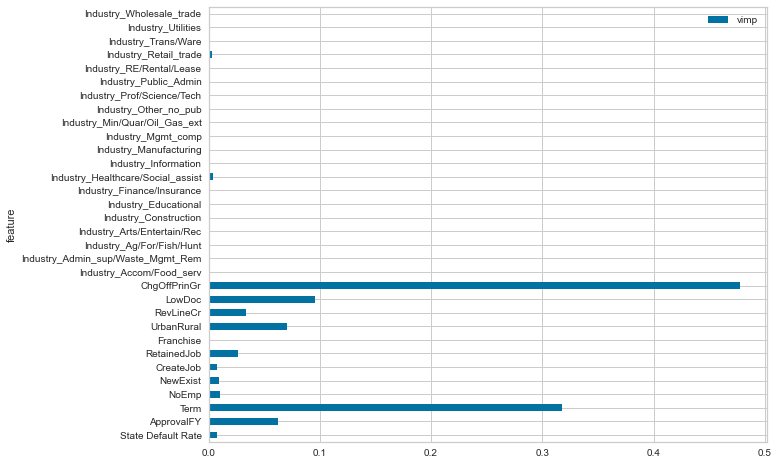

In [45]:
from sklearn import feature_selection
mic = feature_selection.mutual_info_classif(
 X, y
)
fig, ax = plt.subplots(figsize=(10, 8))
(
 pd.DataFrame(
 {"feature": X.columns, "vimp": mic}
 )
 .set_index("feature")
 .plot.barh(ax=ax)
)

## Removing outliers using Isolation Forest 

In [44]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_col = X.select_dtypes(include=numerics)
iforest=IsolationForest(n_estimators=100,contamination=0.02)

pred=iforest.fit_predict(num_col)
score=iforest.decision_function(num_col)


non_anom_index=where(pred==1)
X=X.iloc[non_anom_index]
y=y.iloc[non_anom_index]

## Feature selection using RFE 

In [45]:
#feature selection
lr = LogisticRegression(max_iter=5000)
rfe = RFE(lr, n_features_to_select=10)
model = rfe.fit(X, y)
model.ranking_
rating=pd.DataFrame(list(zip(X.columns,model.ranking_)), columns = ['predictor','ranking'])


In [46]:
predictors=rating[rating.ranking<15]
list1=predictors.predictor
X=X[X.columns.intersection(list1)]

## Evaluation Metrics 

### ROC curve 

In [47]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### PR Curve 

In [48]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

### Classification Score 

In [49]:
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

### Classification Metrics 

In [50]:
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

## Dealing with imbalanced data 

### Visualizing each class 

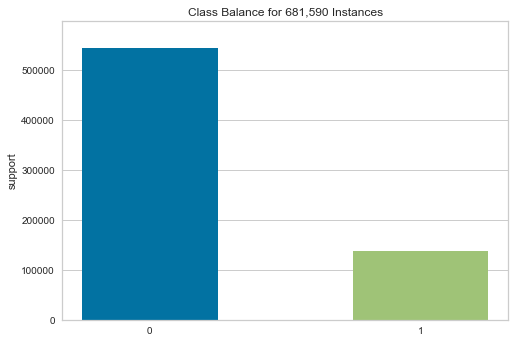

<AxesSubplot:title={'center':'Class Balance for 681,590 Instances'}, ylabel='support'>

In [51]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=["0", "1"])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Balanced weights 
Using SMOTE

In [52]:
from imblearn.over_sampling import (
    SMOTE
)

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [53]:
y.value_counts()

1    544144
0    544144
Name: MIS_Status, dtype: int64

## Split the data 

In [54]:
X_train, X_val_test, y_train, y_val_test =train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test =train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Modeling

## Baseline Model- Dummy Classifier 

In [55]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="stratified")
dummy_scores = cross_val_score(dummy, X, y)
print(dummy_scores)

[0.49862629 0.50123588 0.50150695 0.50047552 0.49874803]


Validation Result:

accuracy score: 0.4977



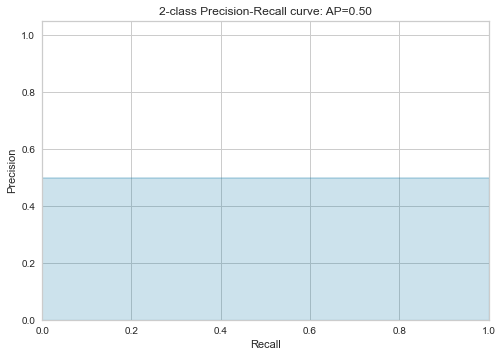

roc auc score: 0.5



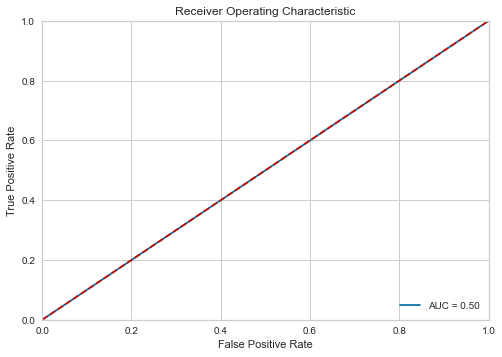

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     81993
           1       0.50      1.00      0.66     81250

    accuracy                           0.50    163243
   macro avg       0.25      0.50      0.33    163243
weighted avg       0.25      0.50      0.33    163243


Confusion Matrix: 
 [[    0 81993]
 [    0 81250]]

End of validation Result



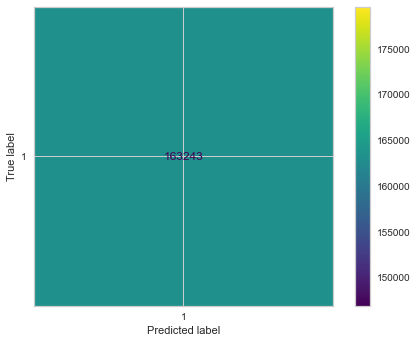

In [56]:
clf_dummy = DummyClassifier()
clf_dummy.fit(X_train, y_train)
clf_score(clf_dummy, X_train, y_train, X_val, y_val, train=False)

## ANN 

In [57]:
max=0
wanted=100
for i in tqdm_notebook(range (2,6)):
    model3 = MLPClassifier(hidden_layer_sizes=(i),max_iter=10)
    scores = cross_val_score(estimator=model3, X=X, y=y, cv=5)
    cross_score=np.average(scores)
    if cross_score>max:
        max=cross_score
        wanted=i
print(max)
print(wanted)


0.7888463626150554
5


## Random Forest 

In [58]:
RF=RandomForestClassifier(random_state=5,n_estimators=100)
model1=RF.fit(X,y)
scores=cross_val_score(estimator=model1,X=X,y=y,cv=5)
cross_score=np.average(scores)
print(cross_score)

0.9301315811885283


Validation Result:

accuracy score: 0.9327



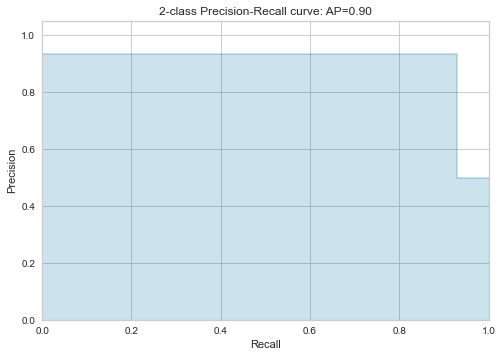

roc auc score: 0.9326837466237737



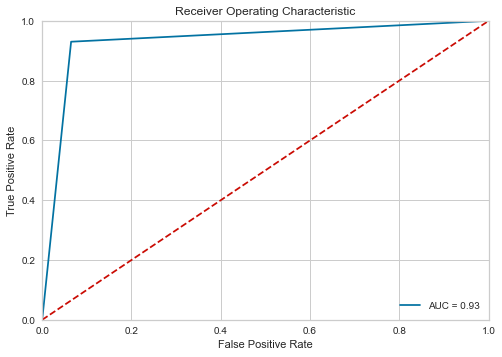

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     81993
           1       0.93      0.93      0.93     81250

    accuracy                           0.93    163243
   macro avg       0.93      0.93      0.93    163243
weighted avg       0.93      0.93      0.93    163243


Confusion Matrix: 
 [[76684  5309]
 [ 5678 75572]]

End of validation Result



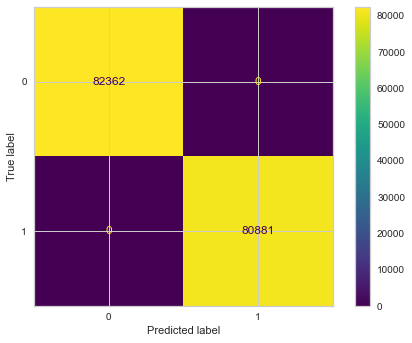

In [59]:
clf_rf = RandomForestClassifier(n_estimators=40, random_state=42)
clf_rf.fit(X_train, y_train)
clf_score(clf_rf, X_train, y_train, X_val, y_val, train=False)

## Logistic Regression 

In [60]:
from sklearn.linear_model import LogisticRegression
clf_log_reg_vanilla = LogisticRegression(C=0.0001, random_state=42)
scores = cross_val_score(estimator=clf_log_reg_vanilla, X=X, y=y, cv=5)
cross_score=np.average(scores)
print(cross_score)

0.775659612731307


In [61]:
clf_log_reg_vanilla = LogisticRegression(C=0.0001, random_state=42, max_iter=500)
clf_log_reg_vanilla.fit(X_train, y_train)

LogisticRegression(C=0.0001, max_iter=500, random_state=42)

Validation Result:

accuracy score: 0.7883



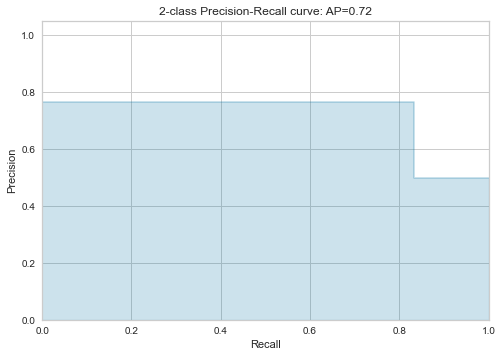

roc auc score: 0.7885156820704206



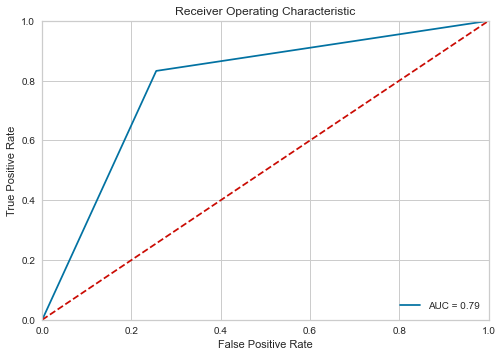

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.74      0.78     81993
           1       0.76      0.83      0.80     81250

    accuracy                           0.79    163243
   macro avg       0.79      0.79      0.79    163243
weighted avg       0.79      0.79      0.79    163243


Confusion Matrix: 
 [[61048 20945]
 [13611 67639]]

End of validation Result



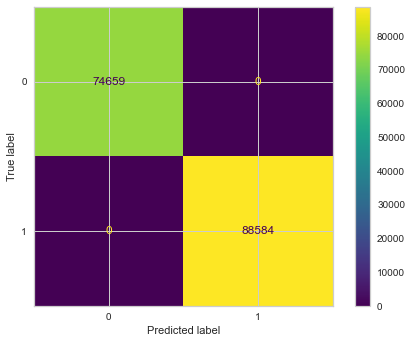

In [62]:
clf_score(clf_log_reg_vanilla, X_train, y_train, X_val, y_val, train=False)

## AdaBoost 

In [63]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada_boost = AdaBoostClassifier(n_estimators=40, random_state=42)
scores = cross_val_score(estimator=clf_ada_boost, X=X, y=y, cv=5)
cross_score=np.average(scores)
print(cross_score)

0.8752922158776266


Validation Result:

accuracy score: 0.8778



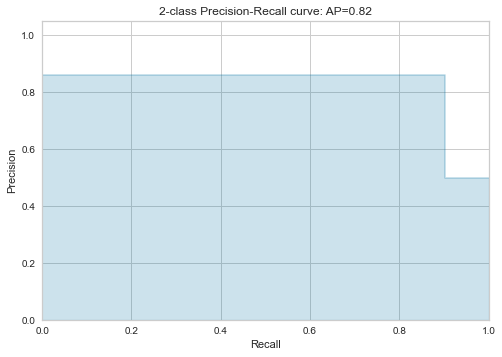

roc auc score: 0.877904425462211



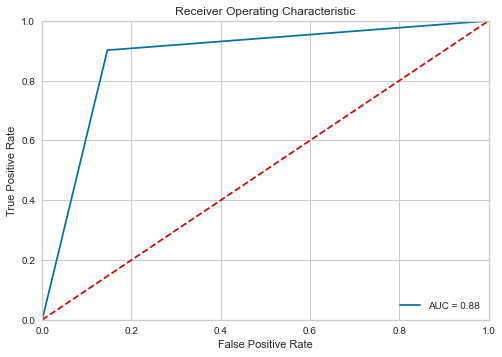

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88     81993
           1       0.86      0.90      0.88     81250

    accuracy                           0.88    163243
   macro avg       0.88      0.88      0.88    163243
weighted avg       0.88      0.88      0.88    163243


Confusion Matrix: 
 [[70023 11970]
 [ 7979 73271]]

End of validation Result



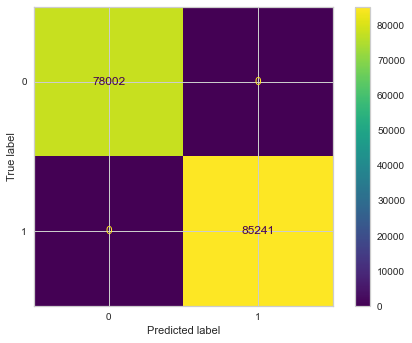

In [64]:
clf_ada_boost = AdaBoostClassifier(n_estimators=40, random_state=42)
clf_ada_boost.fit(X_train, y_train)
clf_score(clf_ada_boost, X_train, y_train, X_val, y_val, train=False)

## Gradient Boosting 

In [75]:
GB=GradientBoostingClassifier(random_state=5,n_estimators=40)
model1=GB.fit(X,y)
scores=cross_val_score(estimator=model1,X=X,y=y,cv=5)
cross_score=np.average(scores)
print(cross_score)

0.8800372819176705


In [66]:
GB=GradientBoostingClassifier(random_state=5,n_estimators=40)
model2=GB.fit(X_train, y_train)

Validation Result:

accuracy score: 0.8962



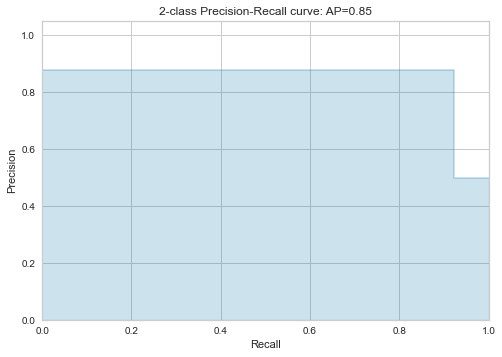

roc auc score: 0.896355530012412



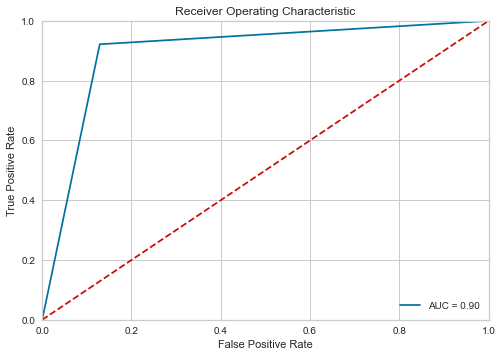

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.87      0.89     81993
           1       0.88      0.92      0.90     81250

    accuracy                           0.90    163243
   macro avg       0.90      0.90      0.90    163243
weighted avg       0.90      0.90      0.90    163243


Confusion Matrix: 
 [[71424 10569]
 [ 6369 74881]]

End of validation Result



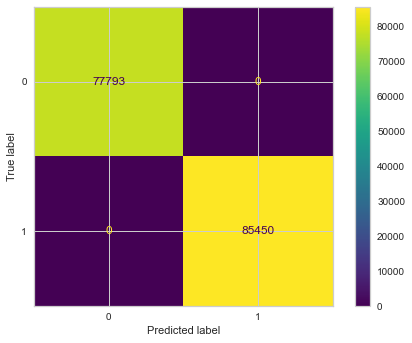

In [67]:
clf_score(model2, X_train, y_train, X_val, y_val, train=False)

### Evaluation Model on test Set 

### Class Prediction Error 

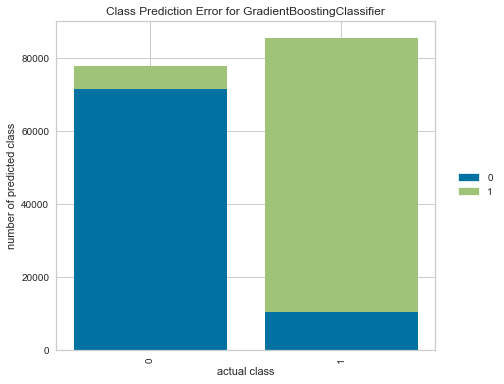

<AxesSubplot:title={'center':'Class Prediction Error for GradientBoostingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [68]:
from yellowbrick.classifier import ClassPredictionError

classes = ["0", "1"]

visualizer = ClassPredictionError(
    model2, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### Classification Report 

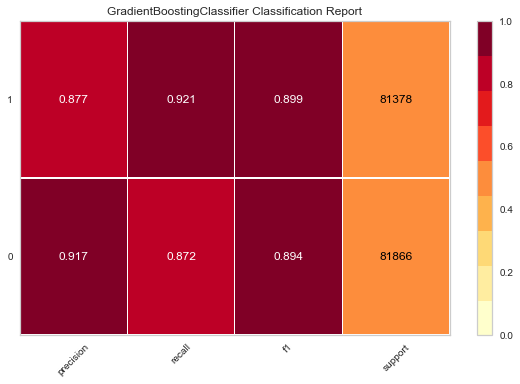

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [69]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(
    model2, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

### Confusion Matrix 

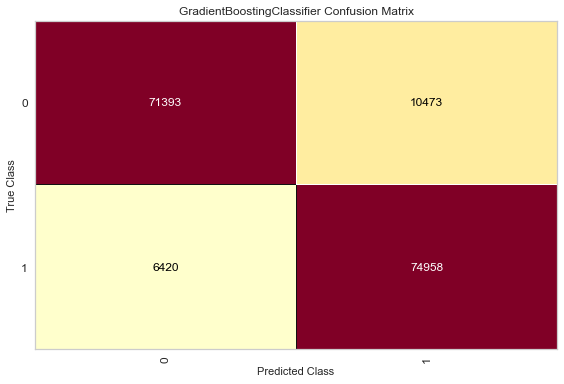

<AxesSubplot:title={'center':'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [70]:
from yellowbrick.classifier import confusion_matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model2, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

### PR Curve 

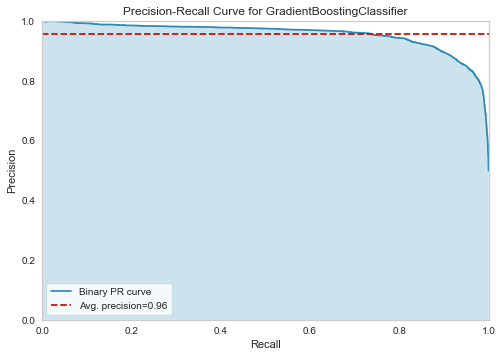

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [71]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(model2, is_fitted=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

### ROC-AUC 

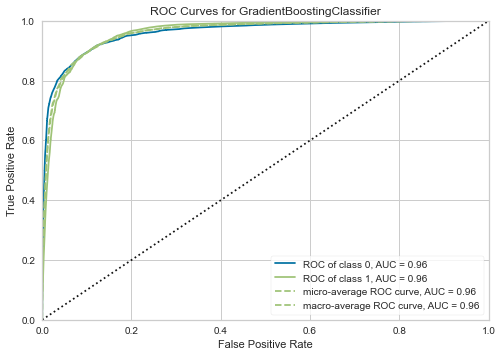

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [72]:
visualizer = ROCAUC(
    model2, classes=classes, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

### Learning Curve 

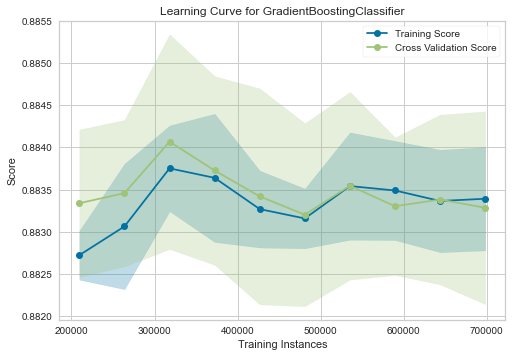

<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [73]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve


# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    GradientBoostingClassifier(random_state=5,n_estimators=40), 
    cv=cv, 
    scoring='f1_weighted', 
    train_sizes=sizes, 
    n_jobs=8
)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.poof()                       # Finalize and render the figure

### Discrimintation Threshold 

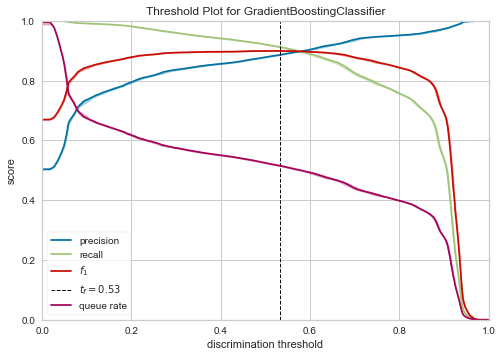

<AxesSubplot:title={'center':'Threshold Plot for GradientBoostingClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [76]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(model2, is_fitted=True)

visualizer.fit(X_train, y_train)
visualizer.poof() 

### Feature Importance 

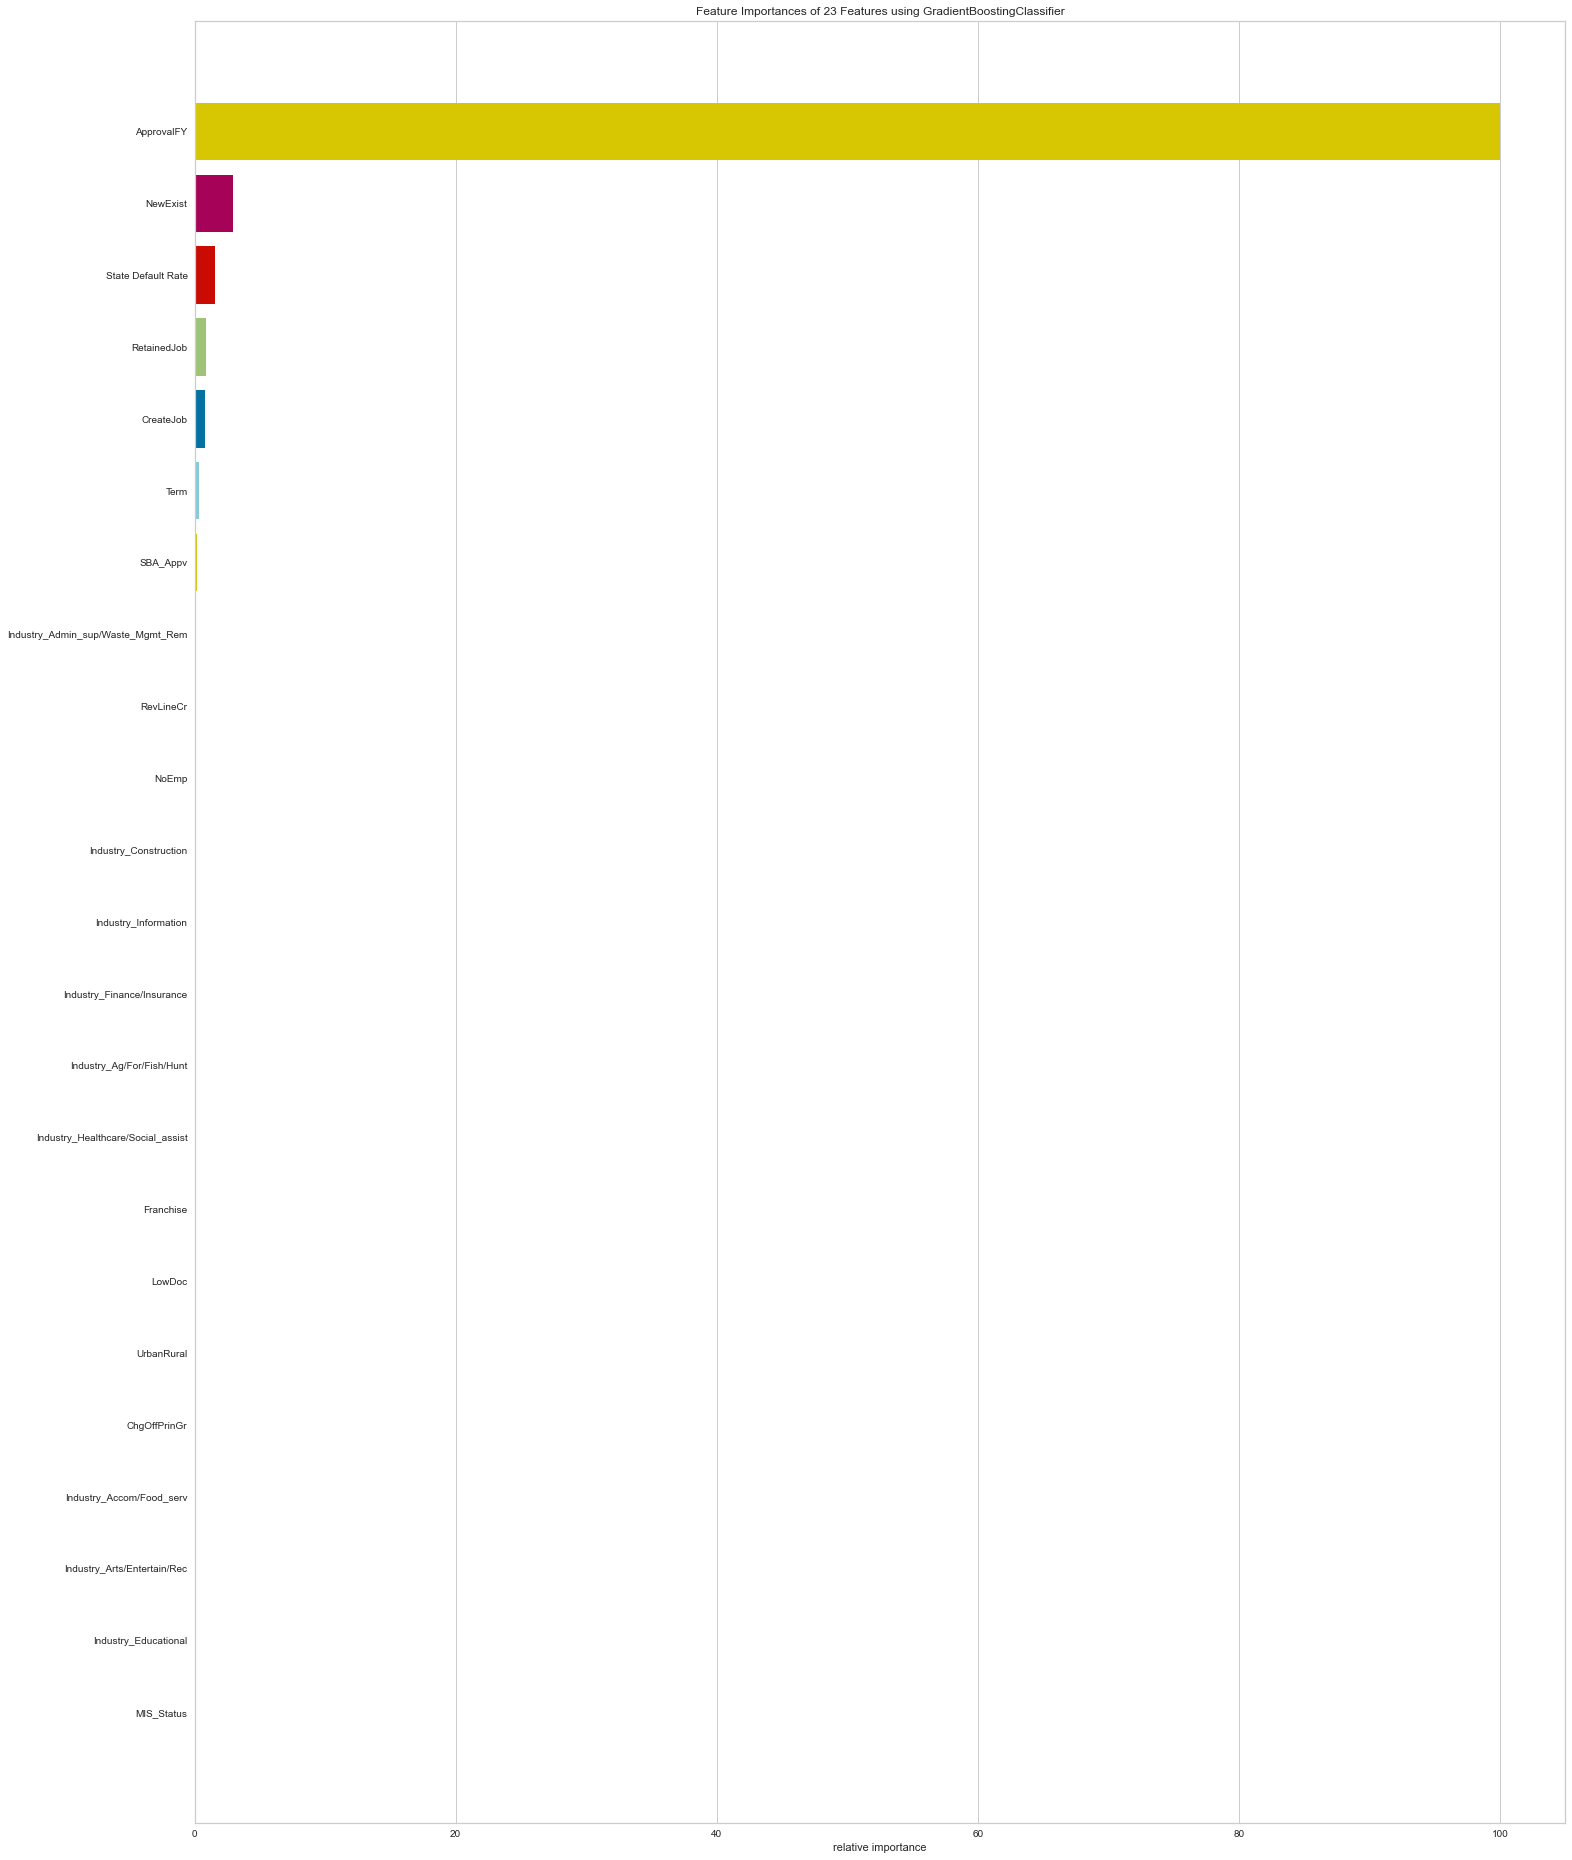

<AxesSubplot:title={'center':'Feature Importances of 23 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [77]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(22, 26))
viz = FeatureImportances(model2, labels=df.columns)
viz.fit(X_train, y_train)
viz.poof()

### Grid Search For HyperParameter tuning 

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = [
   
    {'max_depth':[1,8],'min_samples_split':[5,15],'min_samples_leaf':[4,9],'n_estimators':[50,150]}


  ]

model2 = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(model2, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True, verbose=10)
grid_search.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 1/16] END max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  27.7s
[CV 2/5; 1/16] START max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 1/16] END max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  27.8s
[CV 3/5; 1/16] START max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 3/5; 1/16] END max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  27.5s
[CV 4/5; 1/16] START max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 4/5; 1/16] END max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=  27.1s
[CV 5/5; 1/16] START max_depth=1, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 5/5; 1/16] END max_depth=1, min_samples_leaf

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 8], 'min_samples_leaf': [4, 9],
                          'min_samples_split': [5, 15],
                          'n_estimators': [50, 150]}],
             return_train_score=True, scoring='accuracy', verbose=10)

In [79]:
grid_search.best_params_

{'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 150}

In [80]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=5,
                           n_estimators=150, random_state=42)

In [81]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       27.309901      0.318199         0.188200        0.014645   
1       87.254256      5.990102         0.475818        0.039624   
2       28.276212      0.840924         0.198205        0.016086   
3       80.849424      2.693834         0.405613        0.027305   
4       27.605393      0.808627         0.188011        0.009503   
5       77.898095      2.388396         0.394417        0.031205   
6       25.453432      0.178649         0.180809        0.004537   
7       75.192250      2.165695         0.391013        0.015742   
8      178.316218      3.427386         0.601399        0.009885   
9      671.752251    299.439095         1.681281        0.603758   
10     464.915523      3.412889         0.989143        0.193187   
11     579.466405     55.358082         1.457921        0.115658   
12     180.514346      5.570802         0.591611        0.010209   
13     526.066777     32.463265         1.414611        0.076579   
14     189.628914     11.581192         0.609992        0.009753   
15     559.037242     25.369321         1.426808        0.049449   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
0                1                      4                       5   
1                1                      4                       5   
2                1                      4                      15   
3                1                      4                      15   
4                1                      9                       5   
5                1                      9                       5   
6                1                      9                      15   
7                1                      9                      15   
8                8                      4                       5   
9                8                      4                       5   
10               8                      4                      15   
11               8                      4                      15   
12               8                      9                       5   
13               8                      9                       5   
14               8                      9                      15   
15               8                      9                      15   

   param_n_estimators                                             params  \
0                  50  {'max_depth': 1, 'min_samples_leaf': 4, 'min_s...   
1                 150  {'max_depth': 1, 'min_samples_leaf': 4, 'min_s...   
2                  50  {'max_depth': 1, 'min_samples_leaf': 4, 'min_s...   
3                 150  {'max_depth': 1, 'min_samples_leaf': 4, 'min_s...   
4                  50  {'max_depth': 1, 'min_samples_leaf': 9, 'min_s...   
5                 150  {'max_depth': 1, 'min_samples_leaf': 9, 'min_s...   
6                  50  {'max_depth': 1, 'min_samples_leaf': 9, 'min_s...   
7                 150  {'max_depth': 1, 'min_samples_leaf': 9, 'min_s...   
8                  50  {'max_depth': 8, 'min_samples_leaf': 4, 'min_s...   
9                 150  {'max_depth': 8, 'min_samples_leaf': 4, 'min_s...   
10                 50  {'max_depth': 8, 'min_samples_leaf': 4, 'min_s...   
11                150  {'max_depth': 8, 'min_samples_leaf': 4, 'min_s...   
12                 50  {'max_depth': 8, 'min_samples_leaf': 9, 'min_s...   
13                150  {'max_depth': 8, 'min_samples_leaf': 9, 'min_s...   
14                 50  {'max_depth': 8, 'min_samples_leaf': 9, 'min_s...   
15                150  {'max_depth': 8, 'min_samples_leaf': 9, 'min_s...   

    split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            0.826940  ...         0.817597        0.016123               13   
1            0.842179  ...         0.839232        0.021601                9   
2            0.826940  ...         0.817597        0.016123               13   
3            0.842179  ...         0.839232        0.021601 

In [82]:
final_model = grid_search.best_estimator_


final_predictions = final_model.predict(X_test)

from sklearn import metrics

final_accuracy = accuracy_score(y_test, final_predictions)
cm=metrics.confusion_matrix(y_test, final_predictions)
ps=metrics.precision_score(y_test, final_predictions)
rs=metrics.recall_score(y_test, final_predictions)
f1s=metrics.f1_score(y_test, final_predictions)

In [83]:
print("Model accuracy is : "+ str(final_accuracy))
print("Model Confusion Matrix  is : "+ str(cm))
print("Model Precision Score is : "+ str(ps))
print("Model Recall Score is : "+ str(rs))
print("Model F1 Score is : "+ str(f1s))

Model accuracy is : 0.9503381441278087
Model Confusion Matrix  is : [[77681  4185]
 [ 3922 77456]]
Model Precision Score is : 0.9487389914381255
Model Recall Score is : 0.9518051561847183
Model F1 Score is : 0.9502696004760182
